In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 
from scipy.stats import t
from scipy.stats import chi2
from scipy import integrate

In [3]:
def GetHisto(Data,bines):
    
    h,bins = np.histogram(Data,bins=bines)
    w = np.diff(bins)
    m = bins[:-1] + 0.5*w[0]
    
    hnorm = h / (np.sum(h)*w)
    
    return h,hnorm,m,w

In [19]:
mu, sigma = 0,1
N = 1000
normal = norm.rvs(loc=mu,scale=sigma,size=N)

In [20]:
xbins = np.linspace(np.min(normal),np.max(normal),100)
Hb, HNb, mb, w = GetHisto(normal,xbins)
Hb

array([ 1,  0,  0,  0,  0,  1,  0,  0,  1,  3,  0,  1,  2,  0,  5,  0,  1,
        2,  2,  1,  3,  2,  5,  8,  4,  4,  4,  7, 11,  9, 10,  8,  9, 10,
       15, 16, 19, 19, 23, 17, 24, 24, 20, 23, 29, 30, 31, 27, 32, 22, 27,
       26, 35, 26, 24, 15, 23, 21, 20, 23, 16, 16, 23, 13, 21, 23, 14, 17,
       21, 10, 10,  6, 14,  7, 13,  6,  3,  7,  1,  7,  3,  3,  3,  3,  3,
        2,  2,  1,  0,  1,  0,  0,  2,  1,  0,  0,  0,  1,  2])

(0.0, 1.0)

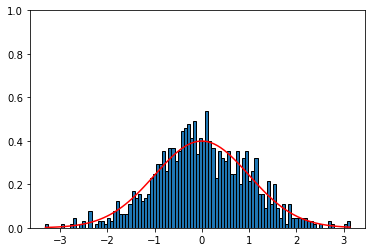

In [21]:
plt.bar( mb, HNb, width=w, ec='k'  )
plt.plot(xbins, norm.pdf(xbins,loc=mu,scale=sigma),color='r')
plt.ylim(0,1)

#for i in range(len(mb)):
#    plt.text( mb[i], 0.02+ np.round( HNb[i],2), \
#            str(np.round( HNb[i]*100,2))+'%', ha='center',fontsize=15  )

In [22]:
np.sum( HNb*xbins[:-1] )

-0.3233680786573734

In [27]:
def normalpdf(x):
    return x*norm.pdf(x,loc=mu,scale=sigma)

In [28]:
I,_ = integrate.quad(normalpdf, -np.inf, np.inf)
I

0.0